🚀 Initializing VolSense.Forecast (model=v6a)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 6 tickers...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Forecasting: 100%|██████████| 6/6 [00:00<00:00, 39.66it/s]


✅ Forecast complete.
  ticker  realized_vol  pred_vol_1  pred_vol_5  pred_vol_10  vol_diff  \
0   AAPL      0.263261    0.371559    0.345468     0.304790  0.108298   
1   MSFT      0.147084    0.280689    0.261830     0.229535  0.133605   
2   NVDA      0.329314    0.561839    0.510363     0.447948  0.232525   
3   TSLA      0.494639    0.637806    0.586821     0.520773  0.143166   
4   META      0.213953    0.479174    0.439553     0.391581  0.265221   
5    JPM      0.191760    0.361235    0.329886     0.282598  0.169475   

   vol_direction  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  


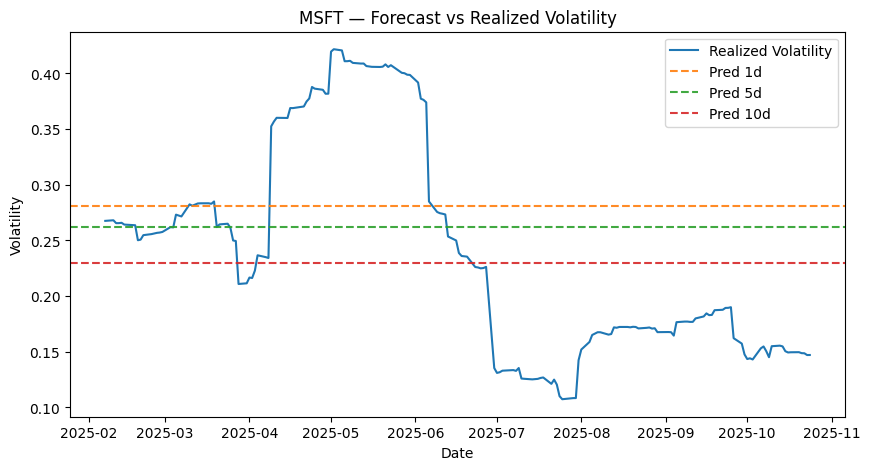

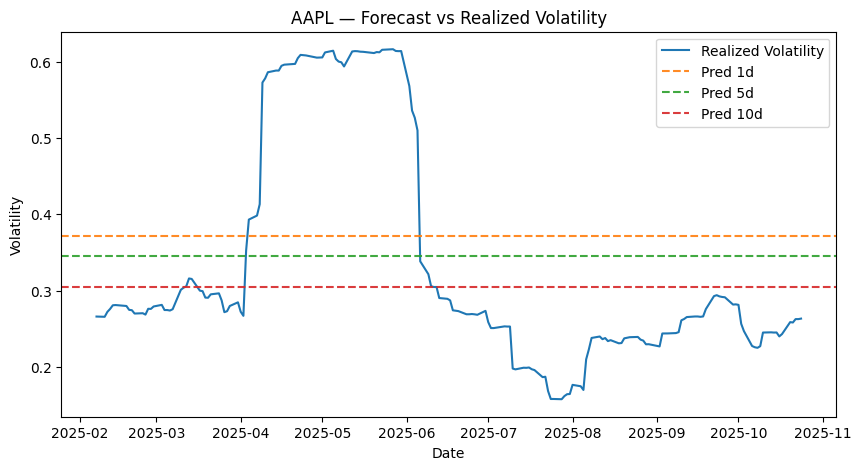

In [1]:
from volsense_inference.forecast_engine import Forecast

# Initialize once
fcast = Forecast(model_version="v6a", checkpoints_dir="models")

# Run forecasts
preds = fcast.run(["AAPL", "MSFT", "NVDA", "TSLA", "META", "JPM"])
print(preds)


fcast.plot("MSFT")
fcast.plot("AAPL")

🚀 Initializing VolSense.Forecast (model=v6a)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 5 tickers...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Forecasting: 100%|██████████| 5/5 [00:00<00:00, 59.28it/s]


✅ Forecast complete.
  ticker  realized_vol  forecast_vol  f/r_ratio    zscore vol_regime
0   TSLA      0.494639      0.586836   1.186391  1.958034   High Vol
1   PYPL      0.366697      0.410583   1.119680  0.847345     Normal
2   AAPL      0.263261      0.345478   1.312302  0.437073     Normal
3   MSFT      0.147084      0.261836   1.780186 -0.090008     Normal
4    SPY      0.108917      0.159657   1.465858 -0.733911    Low Vol
AAPL: 5-day vol ↑ rising (+0.44σ vs peers), regime: Normal.
MSFT: 5-day vol ↑ rising (-0.09σ vs peers), regime: Normal.
TSLA: 5-day vol ↑ rising (+1.96σ vs peers), regime: High Vol.


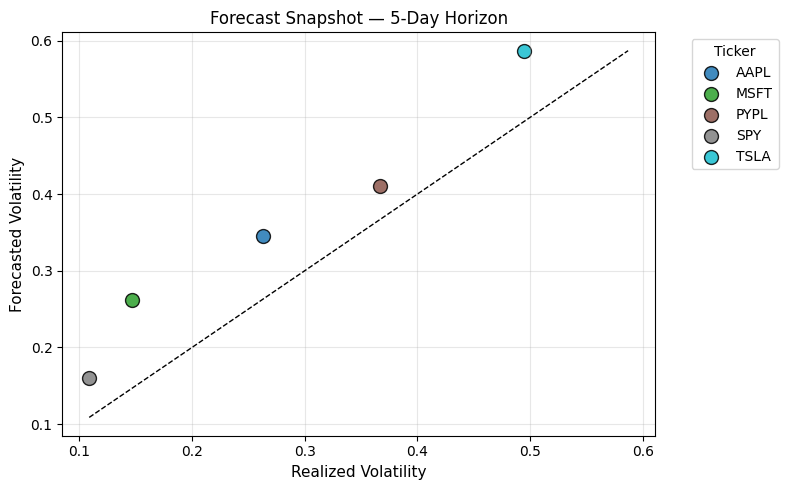

In [4]:
from volsense_inference.forecast_engine import Forecast
from volsense_inference.analytics import Analytics

# Generate forecasts
fcast = Forecast(model_version="v6a", checkpoints_dir="models")
preds = fcast.run(["AAPL", "MSFT", "TSLA", "SPY", "PYPL"])

# Create analytics snapshot
analytics = Analytics(preds)
analytics.compute()

# Trader summary table
print(analytics.summary())

# Human-readable signals
print(analytics.describe("AAPL"))
print(analytics.describe("MSFT"))
print(analytics.describe("TSLA"))

# Quick scatter plot
analytics.plot("pred_vol_5")

In [2]:
preds

,ticker,realized_vol,pred_vol_1,pred_vol_5,pred_vol_10,vol_diff,vol_direction
0,AAPL,0.263261,0.371559,0.345468,0.304790,0.108298,1.0
1,MSFT,0.147084,0.280689,0.261830,0.229535,0.133605,1.0
2,NVDA,0.329314,0.561839,0.510363,0.447948,0.232525,1.0
3,TSLA,0.494639,0.637806,0.586821,0.520773,0.143166,1.0
4,META,0.213953,0.479174,0.439553,0.391581,0.265221,1.0
5,JPM,0.191760,0.361235,0.329886,0.282598,0.169475,1.0


In [1]:
# ============================================================
# 📦 VolSense Evaluation + Signal Pipeline
# ============================================================
from volsense_inference.forecast_engine import Forecast
from volsense_inference.signal_engine import SignalEngine

# ✅ Pick 70 stable tickers from v109 universe (yfinance-compatible)
TICKERS = [
    # Index / ETF
    "SPY","QQQ","DIA","IWM","GLD","SLV","TLT","HYG","EEM",
    # Tech
    "AAPL","MSFT","GOOGL","AMZN","META","NVDA","AVGO","AMD","INTC","ORCL",
    "CRM","TXN","QCOM","ADI","MU","CSCO",
    # Financials
    "JPM","BAC","C","WFC","GS","MS","V","MA","AXP","SCHW",
    # Healthcare
    "JNJ","PFE","MRK","UNH","ABBV","ABT","LLY","BMY","TMO","CVS",
    # Energy / Materials
    "XOM","CVX","COP","SLB","HAL","BP","BHP","RIO","FCX",
    # Consumer Discretionary
    "TSLA","HD","MCD","NKE","SBUX","TGT","BKNG","CMG",
    # Industrials
    "CAT","BA","HON","UPS","FDX","LMT","GE",
    # Consumer Staples
    "PG","KO","PEP","COST","WMT"
]
print(f"✅ Loaded {len(TICKERS)} tickers for test run.")

✅ Loaded 74 tickers for test run.


In [2]:
# ============================================================
# 🚀 Run Volatility Forecasts
# ============================================================
fcast = Forecast(model_version="v109", checkpoints_dir="models", start="2015-01-01")

# Run forecasts on chosen tickers
preds = fcast.run(TICKERS)

# Inspect schema
display(preds.head())
print(f"✅ Forecasts generated for {preds['ticker'].nunique()} tickers.")

🚀 Initializing VolSense.Forecast (model=v109)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 74 tickers...



Forecasting: 100%|██████████| 74/74 [00:04<00:00, 16.87it/s]


✅ Forecast complete.


,ticker,realized_vol,pred_vol_1,pred_vol_5,pred_vol_10,vol_diff,vol_direction
0,SPY,0.108917,0.172503,0.159783,0.140276,0.063586,1.0
1,QQQ,0.143610,0.218266,0.201261,0.177227,0.074656,1.0
2,DIA,0.097440,0.168323,0.155014,0.135080,0.070883,1.0
3,IWM,0.186769,0.252675,0.234354,0.205666,0.065906,1.0
4,GLD,0.251544,0.182096,0.170662,0.150503,-0.069448,-1.0


✅ Forecasts generated for 74 tickers.


In [3]:
# Instantiate Signal Engine and compute all signals
engine = SignalEngine(preds, model_version="v109")
signals = engine.compute_signals(enrich_with_sectors=True)

print(f"\n✅ Signals computed: {signals.shape[0]} rows")
display(signals.head(10))

⚙️ Computing cross-sectional signals for 74 tickers...

✅ Signals computed: 222 rows


,date,ticker,horizon,forecast_vol,today_vol,vol_zscore,vol_spread,xsec_rank,signal_strength,regime_flag,sector,sector_mean,sector_std,sector_median,sector_z,rank_sector,rank_universe,position
0,2025-10-27,AAPL,1,0.371722,0.263261,0.180149,0.411990,0.648649,0.297297,normal,Technology,0.442113,0.126643,0.462344,1.087732,0.400000,0.648649,neutral
1,2025-10-27,AAPL,5,0.345738,NaN,0.221161,NaN,0.675676,0.351351,normal,Technology,0.402762,0.106063,0.411916,1.055016,0.466667,0.675676,neutral
2,2025-10-27,AAPL,10,0.305121,NaN,0.248946,NaN,0.689189,0.378378,normal,Technology,0.353969,0.094035,0.346071,1.077541,0.466667,0.689189,neutral
3,2025-10-27,ABBV,1,0.293605,0.245991,-0.426807,0.193561,0.364865,-0.270270,normal,Healthcare,0.279535,0.054690,0.286324,-0.357211,0.600000,0.364865,neutral
4,2025-10-27,ABBV,5,0.272031,NaN,-0.423474,NaN,0.364865,-0.270270,normal,Healthcare,0.258542,0.048589,0.263494,-0.354946,0.600000,0.364865,neutral
5,2025-10-27,ABBV,10,0.240129,NaN,-0.405105,NaN,0.364865,-0.270270,normal,Healthcare,0.227330,0.041657,0.234080,-0.349143,0.600000,0.364865,neutral
6,2025-10-27,ABT,1,0.226694,0.168088,-0.946695,0.348666,0.175676,-0.648649,normal,Healthcare,0.279535,0.054690,0.286324,-0.357211,0.200000,0.175676,neutral
7,2025-10-27,ABT,5,0.209957,NaN,-0.966365,NaN,0.175676,-0.648649,normal,Healthcare,0.258542,0.048589,0.263494,-0.354946,0.200000,0.175676,neutral
8,2025-10-27,ABT,10,0.185677,NaN,-0.953088,NaN,0.175676,-0.648649,normal,Healthcare,0.227330,0.041657,0.234080,-0.349143,0.200000,0.175676,neutral
9,2025-10-27,ADI,1,0.339293,0.255348,-0.071818,0.328747,0.500000,0.000000,normal,Technology,0.442113,0.126643,0.462344,1.087732,0.266667,0.500000,neutral


In [6]:
preds.to_csv("../../data/metrics/test_forecast_signals.csv", index=False)

📊 Sector Summary for 2025-10-27


,sector,sector_mean,sector_std,sector_z,sector_color
9,Materials,0.467314,0.129247,1.744385,#bcbd22
10,Technology,0.399615,0.108914,1.073430,#1f77b4
4,Financials,0.362506,0.052209,0.702753,#ff7f0e
1,Consumer Discretionary,0.349549,0.115968,0.579979,#8c564b
3,Energy,0.345714,0.096867,0.541747,#d62728
8,Industrials,0.286937,0.050858,-0.039269,#9467bd
6,Healthcare,0.255136,0.048312,-0.353767,#2ca02c
0,Commodities,0.246997,0.112067,-0.434175,#d9b38c
7,Index,0.199508,0.045519,-0.905046,#cccccc
2,Consumer Staples,0.183405,0.030901,-1.061806,#e377c2


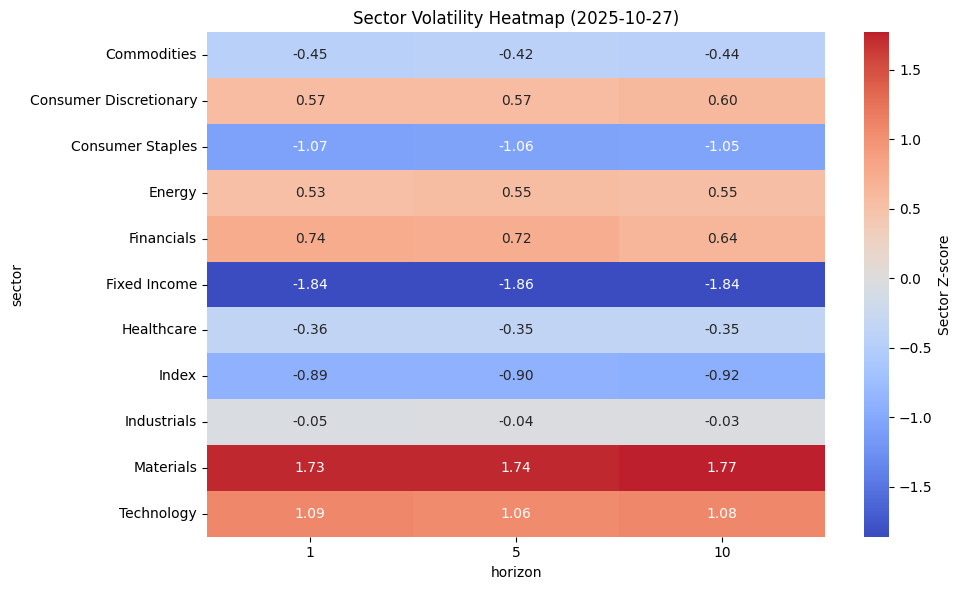

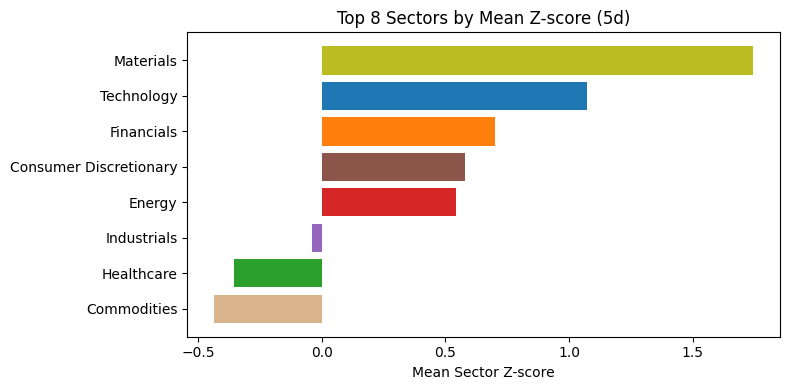

In [4]:
# --- Summary table
sector_summary = engine.sector_summary()

# --- Heatmap visualization
engine.plot_sector_heatmap()

# --- Top sectors by average z-score
engine.plot_top_sectors(horizon=5)

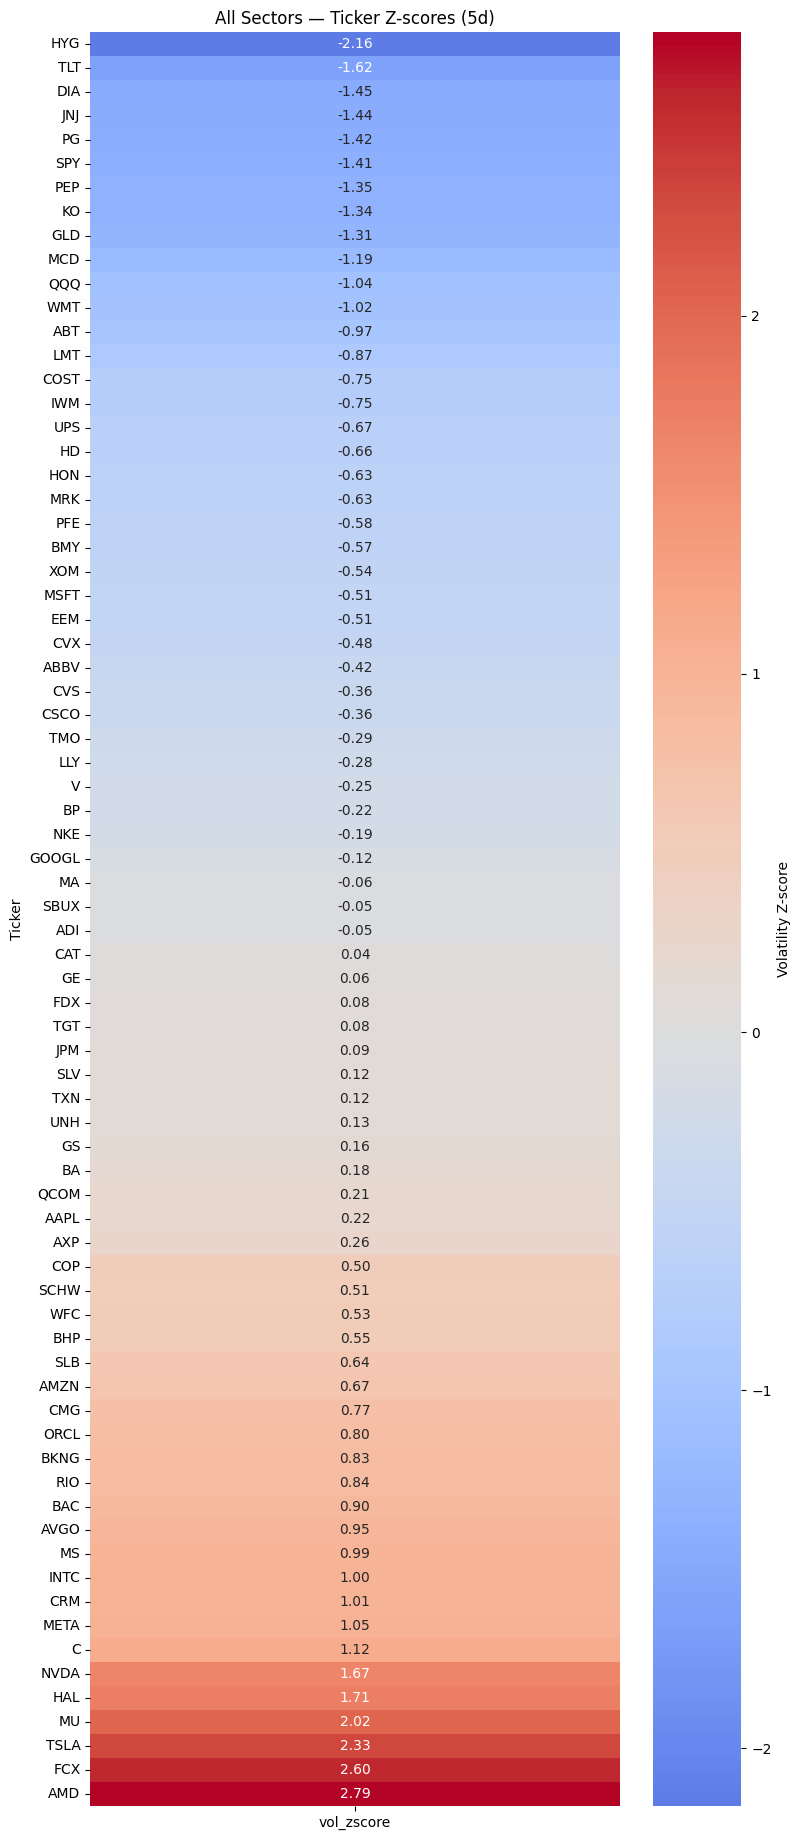

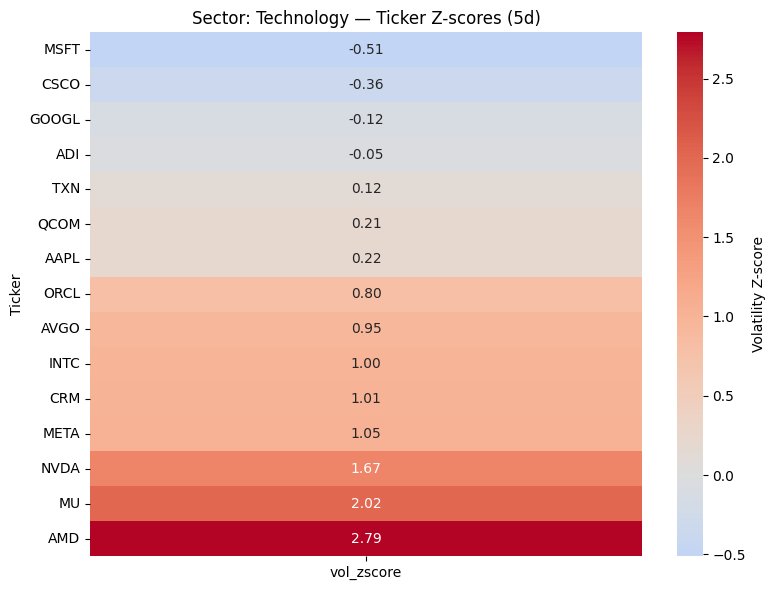

C:\Users\rahul\OneDrive\Documents\GitHub\VolSense\volsense_inference\signal_engine.py:295: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=["green", "gray", "red"])


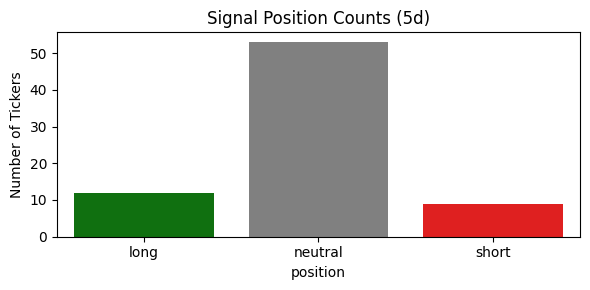

In [5]:
# --- Ticker-level z-score heatmap (all sectors)
engine.plot_ticker_heatmap(horizon=5)

# --- Example: within-sector heatmap
engine.plot_ticker_heatmap(horizon=5, sector="Technology")

# --- Distribution of long/neutral/short positions
engine.plot_position_counts(horizon=5)